In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"loyaltyy","key":"0fb402fb57d1e6204c6d6d9268e6fef1"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d azadshahvaladov/apartment-prices-for-azerbaijan-market

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 97.3MB/s]


In [6]:
!unzip apartment-prices-for-azerbaijan-market.zip -d apartment
!ls apartment

Archive:  apartment-prices-for-azerbaijan-market.zip
  inflating: apartment/BakuApartmentData.csv  
BakuApartmentData.csv


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv("apartment/BakuApartmentData.csv")
df.head()

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1
1,1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,2,755000,Səbail r.,4,210.0,7/18,1,1,1,1
3,3,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1
4,4,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1


In [9]:
column_to_drop = 'Unnamed: 0'
df = df.drop(columns=[column_to_drop])

In [10]:
df.head()

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,755000,Səbail r.,4,210.0,7/18,1,1,1,1
3,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39302 entries, 0 to 39301
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             39302 non-null  int64  
 1   location          39302 non-null  object 
 2   rooms             39302 non-null  int64  
 3   square            39302 non-null  float64
 4   floor             39302 non-null  object 
 5   new_building      39302 non-null  int64  
 6   has_repair        39302 non-null  int64  
 7   has_bill_of_sale  39302 non-null  int64  
 8   has_mortgage      39302 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 2.7+ MB


<Axes: >

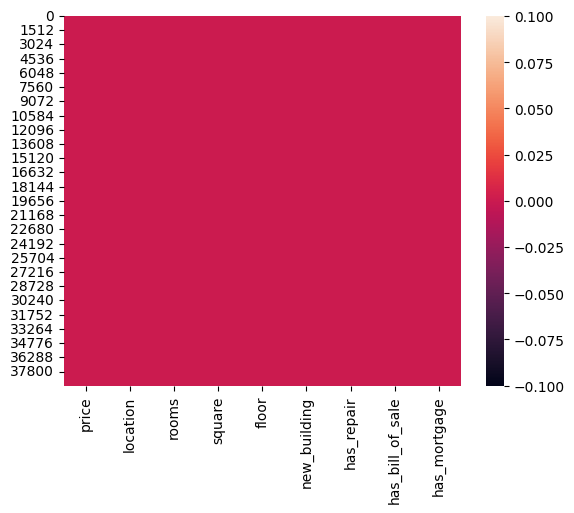

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,price,rooms,square,new_building,has_repair,has_bill_of_sale,has_mortgage
count,3.930200e+04,39302.000000,39302.000000,39302.000000,39302.000000,39302.000000,39302.000000
mean,2.322323e+05,2.813648,106.039311,0.755890,0.839016,0.768256,0.337947
std,1.827754e+05,0.914880,59.856534,0.429564,0.367521,0.421952,0.473016
min,9.600000e+03,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,2.000000,65.000000,1.000000,1.000000,1.000000,0.000000
50%,1.870000e+05,3.000000,94.000000,1.000000,1.000000,1.000000,0.000000
75%,2.770000e+05,3.000000,130.000000,1.000000,1.000000,1.000000,1.000000
max,8.075000e+06,20.000000,1600.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-14-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

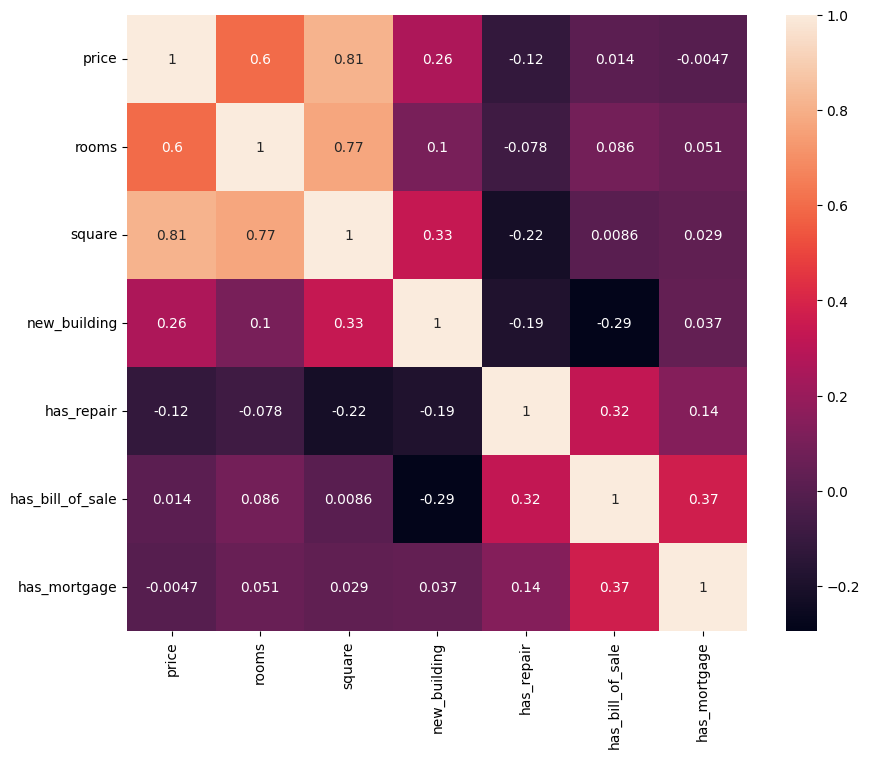

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

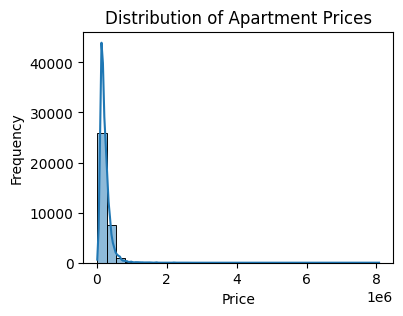

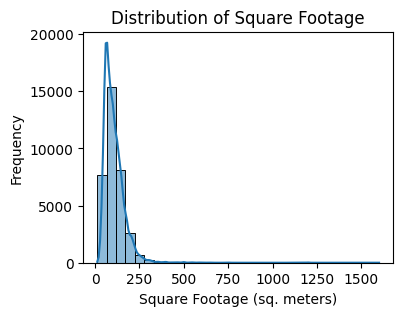

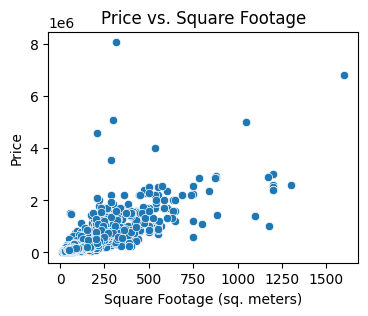

In [26]:
summary_stats = df.describe()

# Distribution of apartment prices
plt.figure(figsize=(4, 3))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of square footage
plt.figure(figsize=(4, 3))
sns.histplot(df['square'], bins=30, kde=True)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage (sq. meters)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Price vs. Square
plt.figure(figsize=(4, 3))
sns.scatterplot(x='square', y='price', data=df)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage (sq. meters)')
plt.ylabel('Price')
plt.show()

In [15]:
df[df.duplicated()]

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
48,245000,Nəsimi m.,4,145.0,6/11,1,1,1,1
103,110000,Yeni Yasamal q.,1,65.0,5/11,1,1,1,1
107,185000,Yeni Yasamal q.,3,115.0,11/20,1,1,1,1
128,250000,Bayıl q.,4,140.0,3/6,1,1,1,1
176,250000,İnşaatçılar m.,3,130.0,17/18,1,1,1,1
...,...,...,...,...,...,...,...,...,...
38989,145000,20 Yanvar m.,5,130.0,5/9,0,0,1,1
38992,127000,Memar Əcəmi m.,2,70.0,6/9,0,0,1,1
39055,220000,28 May m.,3,100.0,4/5,0,0,1,0
39146,170000,Elmlər Akademiyası m.,3,75.0,3/5,0,0,1,0


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df['location_m_q_r'] = df.location.str.split().str[-1].str.replace('.', '')
print(df.location_m_q_r)

0        m
1        m
2        r
3        m
4        m
        ..
39297    q
39298    m
39299    m
39300    m
39301    m
Name: location_m_q_r, Length: 34814, dtype: object


<ipython-input-17-f9e2f94177bd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['location_m_q_r'] = df.location.str.split().str[-1].str.replace('.', '')


In [18]:
df['location'] = df['location'].str.replace('m.', '').str.replace('q.', '').str.replace('r.', '').str.strip()
print(df.location)

0          AzadlıPspekti
1        Şah İsyıl Xətai
2                 Səbail
3           EləAkadeyası
4           EləAkadeyası
              ...       
39297          9-cu kyon
39298              MeƏcə
39299         İnşaatçıla
39300       EləAkadeyası
39301              MeƏcə
Name: location, Length: 34814, dtype: object


<ipython-input-18-aacf31acc8e0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['location'] = df['location'].str.replace('m.', '').str.replace('q.', '').str.replace('r.', '').str.strip()


In [19]:
df['first_floor'] = (df.floor.str.split('/').str[0] == '1').astype(int)
print(df.first_floor.value_counts())
df['last_floor'] = (df.floor.str.split('/').str[0] == df.floor.str.split('/').str[-1]).astype(int)
print(df['last_floor'].value_counts())
df = df.drop(['floor'], axis=1)

0    33532
1     1282
Name: first_floor, dtype: int64
0    31205
1     3609
Name: last_floor, dtype: int64


In [20]:
print('Avarage apartment prices located on last floor:', df[df['last_floor'] == 1]['price'].mean())
print('Avarage apartment prices located on first floor:', df[df['first_floor'] == 1]['price'].mean())
print('Avarage apartment prices not located on last and first floor:', df[(df['last_floor'] == 0) & (df['first_floor'] == 0)]['price'].mean())

Avarage apartment prices located on last floor: 180094.07509005265
Avarage apartment prices located on first floor: 140969.83385335412
Avarage apartment prices not located on last and first floor: 244265.56237266623


In [21]:
features = ['square', 'rooms', 'new_building', 'has_repair', 'has_bill_of_sale', 'has_mortgage', 'first_floor', 'last_floor', 'location_m_q_r']
X = df[features]
y = df.price

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()

In [24]:
df['location_m_q_r'] = df['location_m_q_r'].map({'q': 0, 'r': 1, 'm': 2}).astype(int)

In [25]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: ignored

In [ ]:
score = model.score(X_test, y_test)
print(f"this has {score} of score")

urutan inputan model : area (m^2), jumlah kamar, apakah bangunan baru?(1 yes, 0 no), apakah sudah pernah diperbaiki?(1 yes, 0 no), apakah ada akta pembelian??(1 yes, 0 no), mortage(1 yes, 0 no), apakah di lantai pertama?(1 yes, 0 no),apakah di lantai terakhir?(1 yes, 0 no), location (metro, quarter, rayon).


In [ ]:
input_data = np.array([[245, 3, 1, 1, 1, 1, 1, 0, 2]])

In [ ]:
prediction = model.predict(input_data)
print('Estimasi harga apartment di azerbaijan dalam Manat : ', prediction)

In [ ]:
import pickle

filename = "estimasi_apartment.sav"
pickle.dump(model,open(filename,'wb'))

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Tentukan ambang batas untuk mengubah prediksi menjadi kelas biner
threshold = 200000  # Misalnya, jika harga apartemen di atas 200,000 AZN dianggap mahal

# Ubah nilai prediksi menjadi kelas biner berdasarkan ambang batas
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Hitung F1 score
f1 = f1_score(y_test_binary, y_pred_binary)

print('F1 Score:', f1)